# RETAIL MARKETING PROJECT 

First lets import all the necessary libraries for working on our files

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display the numbers in float format rather than numbers

lets check the files one by one

In [2]:
# transaction data for Connecticut
cust_transaction_ct = pd.read_csv(r'D:\Retail_Marketing_project\CUSTOMER_TRANSACTION_CT_FINAL.TXT', sep=","  )
cust_transaction_ct.shape

(3419739, 8)

In [3]:
# complete customer information
cust_master = pd.read_csv(r'D:\Retail_Marketing_project\RETAIL_CUSTOMER_MASTER_FINAL.txt', sep='\t')
print(cust_master.shape)
print(cust_master.columns)

(378056, 14)
Index(['CUSTOMER_ID', 'First_Name', 'Last_Name', 'Gender', 'E_Mail',
       'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'State', 'Zip',
       'Region', 'STORE_ID', 'STORE_REG_DATE'],
      dtype='object')


In [4]:
# record of all the stores available over USA
store_master = pd.read_excel(r'D:\Retail_Marketing_project\STORE_MASTER_DUMP.XLSX')
store_master.shape

(149, 6)

In [5]:
# table containing information of all the products falling under our umbrella
prod_master = pd.read_excel(r'D:\Retail_Marketing_project\RETAIL_PROD_MASTER_FINAL.XLSX')
prod_master.shape

(49230, 18)

## DATA CLEANING AND TRANSFORMATION

CUSTOMER MASTER

In [6]:
cust_master.dtypes

CUSTOMER_ID        int64
First_Name        object
Last_Name         object
Gender            object
E_Mail            object
Date_of_Birth     object
SSN               object
Phone_No          object
STATE_NAME        object
State             object
Zip                int64
Region            object
STORE_ID          object
STORE_REG_DATE    object
dtype: object

date type variables are being read as objects, we would have to change that to perform datetime functions on that


In [7]:
cust_master['Date_of_Birth'] = pd.to_datetime(cust_master['Date_of_Birth'])
cust_master['STORE_REG_DATE'] = pd.to_datetime(cust_master['STORE_REG_DATE'])

In [8]:
# defining a function so that we can calculate age for different variables
def age(born):
    today = dt.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

cust_master['Age'] = cust_master['Date_of_Birth'].apply(age)
cust_master['Relationship_age'] = cust_master['STORE_REG_DATE'].apply(age) * 12

In [9]:
cust_master['Age_bucket'] = 'A1.YOUNG-AGE'
cust_master['Age_bucket'][cust_master['Age']>=30] = 'A2.MID-YOUNG-AGE'
cust_master['Age_bucket'][cust_master['Age']>=40] = 'A3.MID-AGE'
cust_master['Age_bucket'][cust_master['Age']>=50] = 'A2.MID-OLD-AGE'
cust_master['Age_bucket'][cust_master['Age']>=60] = 'A5.OLD-AGE'

In [10]:
cust_master['AON'] = 'A7.NEW'
cust_master['AON'][cust_master['Relationship_age']>=6] = 'A6.6 MONTHS+'
cust_master['AON'][cust_master['Relationship_age']>=12] = 'A5.1+ YEARS'
cust_master['AON'][cust_master['Relationship_age']>=24] = 'A4.2+ YEARS'
cust_master['AON'][cust_master['Relationship_age']>36] = 'A3.3+ YEARS'
cust_master['AON'][cust_master['Relationship_age']>=48] = 'A2.4+ YEARS'
cust_master['AON'][cust_master['Relationship_age']>=60] = 'A2.5+ YEARS'

In [11]:
cust_master.head()

,CUSTOMER_ID,First_Name,Last_Name,Gender,E_Mail,Date_of_Birth,SSN,Phone_No,STATE_NAME,State,Zip,Region,STORE_ID,STORE_REG_DATE,Age,Relationship_age,Age_bucket,AON
0,135363,Lizeth,Mccoll,F,lizeth.mccoll@ibm.com,1973-07-05,171-86-6830,216-703-2865,California,CA,44601,Midwest,STORE_81,2003-12-03,49,216,A3.MID-AGE,A2.5+ YEARS
1,135384,Damian,Patillo,M,damian.patillo@outlook.com,1975-03-11,326-11-9852,209-784-3915,Oklahoma,OK,93607,West,STORE_79,2014-06-17,47,96,A3.MID-AGE,A2.5+ YEARS
2,135395,Imogene,Hagopian,F,imogene.hagopian@gmail.com,1995-02-19,656-36-0772,210-460-6327,Louisiana,LA,77806,South,STORE_126,2008-05-15,27,168,A1.YOUNG-AGE,A2.5+ YEARS
3,135400,Jesusita,Hollie,F,jesusita.hollie@hotmail.com,1987-10-30,375-37-3861,209-219-5562,Minnesota,MN,90290,West,STORE_54,2013-12-17,35,96,A2.MID-YOUNG-AGE,A2.5+ YEARS
4,135409,Vanda,Komar,F,vanda.komar@aol.com,1962-09-02,002-11-5408,216-224-9563,Michigan,MI,44312,Midwest,STORE_143,2014-09-26,60,96,A5.OLD-AGE,A2.5+ YEARS


STORE MASTER

In [12]:
store_master.head()

,STORE_ID,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS
0,STORE_1,Acme Fresh Market,Ohio,2003-12-12,9656,22
1,STORE_2,Amigo Supermarkets,Pennsylvania,2002-12-11,4113,28
2,STORE_3,Big Y,Massachusetts,2002-08-11,6194,11
3,STORE_4,Big Y,Connecticut,2005-01-23,4543,12
4,STORE_5,Buehler's,Ohio,2004-10-09,3147,30


As we can see there are many stores , we are going to perform analysis only for one store

In [13]:
store_master.dtypes

STORE_ID                    object
STORE_NAME                  object
PROVINCE                    object
STORE_INC_DATE      datetime64[ns]
STORE_SIZE_SQ_FT             int64
NO_OF_STAFFS                 int64
dtype: object

In [14]:
store_master['Store_size'] = 'MINI STORE'
store_master['Store_size'][store_master['STORE_SIZE_SQ_FT'] >= 3000] = 'BIG STORE'
store_master['Store_size'][store_master['STORE_SIZE_SQ_FT'] >= 5000] = 'MID STORE'

In [15]:
store_master['store_age'] = store_master['STORE_INC_DATE'].apply(age)

In [16]:
store_master['STORE_TYPE'] = 'NEW-AGE'
store_master['STORE_TYPE'][store_master['store_age'] > 2] = 'GROWTH-AGE'
store_master['STORE_TYPE'][store_master['store_age'] > 5] = 'MID-AGE'
store_master['STORE_TYPE'][store_master['store_age'] > 10] = 'OLD-AGE'


In [17]:
store_master.head()

,STORE_ID,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS,Store_size,store_age,STORE_TYPE
0,STORE_1,Acme Fresh Market,Ohio,2003-12-12,9656,22,MID STORE,18,OLD-AGE
1,STORE_2,Amigo Supermarkets,Pennsylvania,2002-12-11,4113,28,BIG STORE,19,OLD-AGE
2,STORE_3,Big Y,Massachusetts,2002-08-11,6194,11,MID STORE,20,OLD-AGE
3,STORE_4,Big Y,Connecticut,2005-01-23,4543,12,BIG STORE,17,OLD-AGE
4,STORE_5,Buehler's,Ohio,2004-10-09,3147,30,BIG STORE,18,OLD-AGE


TRANSACTION MASTER

we will get the stores that are in Connecticut using STORE_ID in customer_master 

In [18]:

transaction_master = pd.merge(left= cust_transaction_ct,right=cust_master[['CUSTOMER_ID','STORE_ID']], how= 'inner', on= 'CUSTOMER_ID' )

In [19]:
transaction_master['STORE_ID'].unique()

array(['STORE_122', 'STORE_4', 'STORE_93', 'STORE_41', 'STORE_6'],
      dtype=object)

These are the stores that are in Connecticut.

In [20]:
transaction_master = transaction_master[transaction_master['STORE_ID']=='STORE_93'] #chose this store on random
transaction_master.head()

,CUSTOMER_ID,State,PROD_CAT,PROD_ID,VISIT_YEAR,VISIT_MONTH,CNT,ORDER_QTY,STORE_ID
50,135974,CT,CAT-A,PROD-1754,2020,12,1,2,STORE_93
51,135974,CT,CAT-A,PROD-2580,2020,12,1,5,STORE_93
52,135974,CT,CAT-A,PROD-4352,2020,12,1,3,STORE_93
53,135974,CT,CAT-A,PROD-574,2020,12,1,3,STORE_93
54,135974,CT,CAT-B,PROD-1329,2020,12,1,3,STORE_93


Now this is the filtered transaction master for the store_93 in connecticut

In [21]:
store_master = store_master[store_master['STORE_ID']=='STORE_93']
store_master.head()

,STORE_ID,STORE_NAME,PROVINCE,STORE_INC_DATE,STORE_SIZE_SQ_FT,NO_OF_STAFFS,Store_size,store_age,STORE_TYPE
92,STORE_93,Remke Markets,Connecticut,1998-11-05,2777,13,MINI STORE,23,OLD-AGE


# DATAMODEL

In [22]:
datamodel = pd.merge(left=transaction_master, right=cust_master[cust_master['STORE_ID']=='STORE_93'], how ='left', on = 'CUSTOMER_ID')
datamodel = pd.merge(left = datamodel , right =store_master, how= 'left', left_on= 'STORE_ID_x' ,right_on='STORE_ID')
datamodel = pd.merge(left = datamodel, right = prod_master, how = 'inner', left_on= ['PROD_ID', 'VISIT_YEAR','PROD_CAT'], right_on= ['PROD_ID','PRICE_YEAR','CAT'])

removing uncessary variables and renaming the variables for proper understanding

In [23]:
datamodel = datamodel.drop(['CNT','E_Mail','State_y','SALE_PRICE_INR','RAND_NO','PD_ID','PRICE_YEAR','COST_PRICE_INR','STORE_ID_x','State_y','STORE_ID_y','RATING','DESCRIPTION'],axis=1)
datamodel = datamodel.rename({'State_x':'State', 'SALE_PRICE_USD':'SALES_PRICE' ,'COST_PRICE_USD':'COST_PRICE'}, axis=1)

In [24]:
datamodel['SALES_REV'] = datamodel['SALES_PRICE'] * datamodel['ORDER_QTY']

now we have all the data as we need

In [25]:
import random as rnd

color= ('#CDAA7D','#5F9EA0','#FF7F50','#8B8878','#EE6A50','#9932CC','#483D8B','#EEB422')
def plot_anlys(columns):
    anlys[columns].plot.bar(color=rnd.choices(color,k=len(columns))).ticklabel_format(style='plain',axis="y")
    plt.ylabel( columns)
    plt.legend()
  

    

In [26]:
def plot_two_axes(X,Y):

    ax = anlys[X].plot.bar(figsize=(10,5),color=rnd.choices(color,k=1) )
    ax.set_ylabel(X)
    ax1 = ax.twinx()
    ax1 = anlys[Y].plot.line(color='black' , figsize=(8,4))
    ax1.ticklabel_format(style='plain',axis='y')
    ax1.set_ylabel(Y)
    ax1.legend()
    ax.legend()

# CUSTOMER ANALYTICS

##### CUSTOMER WISE UNIQUE COUNT OF MONTHS VISITED CUSTOMERS, TOTAL VISITS , SPENT PER MONTH, SPENT_PER_VIST


In [27]:
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH','SALES_REV']].groupby('CUSTOMER_ID').aggregate({'VISIT_MONTH' :pd.Series.nunique, 'CUSTOMER_ID': 'count', 'SALES_REV':np.sum}).rename({'VISIT_MONTH':'UNQ_MONTHS_VISITED','CUSTOMER_ID':'TOTAL_VISITS','SALES_REV':'TOTAL_SALES'},axis=1)
anlys['SPENT_PER_VISIT'] = anlys['TOTAL_SALES']/ anlys['TOTAL_VISITS'] 
anlys['SPENT_PER_MONTH'] = anlys['TOTAL_SALES']/ anlys['UNQ_MONTHS_VISITED'] 
print('ROWS,COLUMNS - > ' ,anlys.shape)
anlys.head()

ROWS,COLUMNS - >  (4204, 5)


,UNQ_MONTHS_VISITED,TOTAL_VISITS,TOTAL_SALES,SPENT_PER_VISIT,SPENT_PER_MONTH
CUSTOMER_ID,,,,,
135974,1,23,268.330,11.667,268.330
135977,1,10,93.492,9.349,93.492
136291,4,90,993.682,11.041,248.421
137150,9,291,4882.721,16.779,542.525
138564,11,418,5734.868,13.720,521.352


##### VISIT YEAR WISE UNIQUE COUNT OF MONTHS VISITED CUSTOMERS, TOTAL VISITS , SPENT PER MONTH, SPENT_PER_VIST


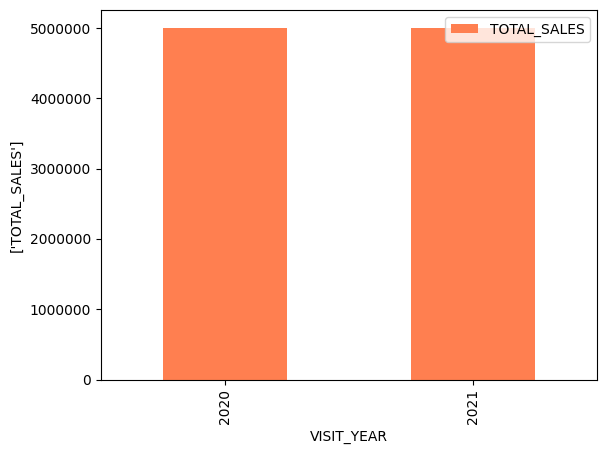

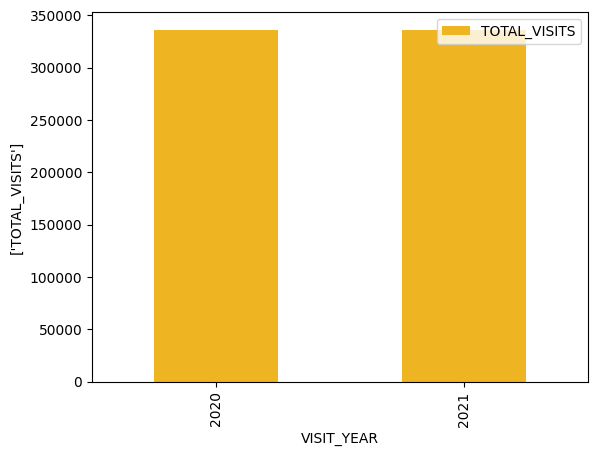

In [28]:
anlys = datamodel[['CUSTOMER_ID','VISIT_YEAR','VISIT_MONTH','SALES_REV']].groupby('VISIT_YEAR').aggregate({'CUSTOMER_ID' :pd.Series.nunique, 'VISIT_YEAR': 'count', 'SALES_REV':'sum'}).rename({'CUSTOMER_ID':'UNQ_CUST_VISITED','VISIT_YEAR':'TOTAL_VISITS','SALES_REV':'TOTAL_SALES'},axis=1)
anlys['SPENT_PER_VISIT'] = (anlys['TOTAL_SALES']/ anlys['TOTAL_VISITS'] )
anlys['SPENT_PER_MONTH'] = anlys['TOTAL_SALES']/ anlys['UNQ_CUST_VISITED'] 
anlys.head()
plot_anlys(['TOTAL_SALES'])
plot_anlys(['TOTAL_VISITS'])

##### VISIT MONTH WISE UNIQUE COUNT OF MONTHS VISITED CUSTOMERS, TOTAL VISITS , SPENT PER MONTH, SPENT_PER_VIST


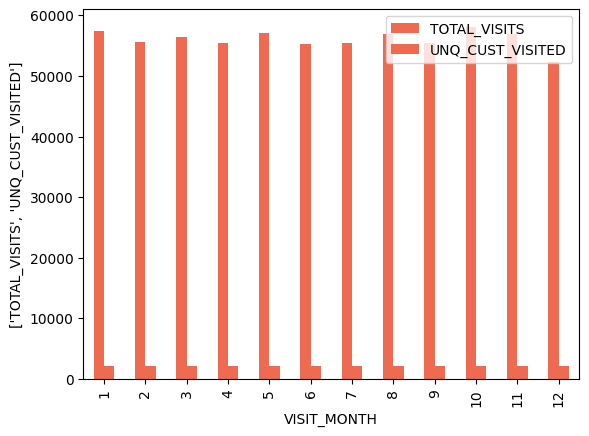

In [29]:
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH','SALES_REV']].groupby('VISIT_MONTH').aggregate({'CUSTOMER_ID' :pd.Series.nunique, 'VISIT_MONTH': 'count', 'SALES_REV':'sum'}).rename({'CUSTOMER_ID':'UNQ_CUST_VISITED','VISIT_MONTH':'TOTAL_VISITS','SALES_REV':'TOTAL_SALES'},axis=1)
anlys['SPENT_PER_VISIT'] = (anlys['TOTAL_SALES']/ anlys['TOTAL_VISITS'] )
anlys['SPENT_PER_MONTH'] = anlys['TOTAL_SALES']/ anlys['UNQ_CUST_VISITED'] 
anlys.head()
plot_anlys(['TOTAL_VISITS','UNQ_CUST_VISITED'])

WE can see that most of the customers are repeated buyers

### VISIT SEGMENTS

##### Creating Visit Segments based on visits by the customer each month
If customer visited more than equal to 10 times in a month he is a regular visit customers, 

if more than eqaul to 8 but less than 10, then Subsequent visits. 

If more than equal to 6 but less than 8 then a Recurrent Visit customer, 

if only 1 visit, then first visit 

else all as Non recurrent visits

In [30]:
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH']].groupby('CUSTOMER_ID').agg({'VISIT_MONTH':pd.Series.nunique}).rename({'VISIT_MONTH':'UNQ_MONTH_VISITED'},axis=1).reset_index()
anlys['VISIT_SEGMENT'] = 'FIRST VISIT'
anlys['VISIT_SEGMENT'][anlys['UNQ_MONTH_VISITED'] >= 2] = 'NON RECURRENT VISITS'
anlys['VISIT_SEGMENT'][anlys['UNQ_MONTH_VISITED'] >= 6] = 'RECURRENT VISITS'
anlys['VISIT_SEGMENT'][anlys['UNQ_MONTH_VISITED'] >= 8] = 'SUBSEQUENT VISITS'
anlys['VISIT_SEGMENT'][anlys['UNQ_MONTH_VISITED'] >= 10] = 'REGULAR VISITS'
anlys.head()


,CUSTOMER_ID,UNQ_MONTH_VISITED,VISIT_SEGMENT
0,135974,1,FIRST VISIT
1,135977,1,FIRST VISIT
2,136291,4,NON RECURRENT VISITS
3,137150,9,SUBSEQUENT VISITS
4,138564,11,REGULAR VISITS


Now lets map these segments back to the datamodel

In [31]:
datamodel = pd.merge(left=datamodel, right=anlys[['CUSTOMER_ID','VISIT_SEGMENT']], on='CUSTOMER_ID', how='inner')

In [32]:
datamodel.head()

,CUSTOMER_ID,State,PROD_CAT,PROD_ID,VISIT_YEAR,VISIT_MONTH,ORDER_QTY,First_Name,Last_Name,Gender,...,SUB_CATEGORY,BRAND,SALES_PRICE,MARKET_PRICE,MARKET_USD,TYPE,CAT,COST_PRICE,SALES_REV,VISIT_SEGMENT
0,135974,CT,CAT-A,PROD-1754,2020,12,2,Joyce,Rameriz,F,...,Drinks & Beverages,Nutriorg,3.392,245.000,3.769,Health Drinks,CAT-A,3.392,6.785,FIRST VISIT
1,135974,CT,CAT-A,PROD-2580,2020,12,5,Joyce,Rameriz,F,...,"Mops, Brushes & Scrubs",Scotch brite,2.600,169.000,2.600,"Mops, Wipers",CAT-A,2.470,13.000,FIRST VISIT
2,135974,CT,CAT-A,PROD-4352,2020,12,3,Joyce,Rameriz,F,...,Chocolates & Candies,Smint,0.615,40.000,0.615,Mints & Chewing Gum,CAT-A,0.566,1.846,FIRST VISIT
3,135974,CT,CAT-A,PROD-574,2020,12,3,Joyce,Rameriz,F,...,Bath & Hand Wash,Palmolive,5.529,599.000,9.215,Shower Gel & Body Wash,CAT-A,5.529,16.588,FIRST VISIT
4,135974,CT,CAT-B,PROD-1329,2020,12,3,Joyce,Rameriz,F,...,Crockery & Cutlery,Superware,3.523,295.000,4.538,Glassware,CAT-B,2.959,10.569,FIRST VISIT


### CUSTOMER SEGMENTATION


If the customer's total spent is 125% or more , than store's avg sales then the customer is a 'Premier' Customer

If the customer's total spent is more than or equal to store's average sales then 'Power' Customer

If the customer's total spent is more than or equal to 50 % store's average sales then 'Advanced' Customer

else If the total spent is less than 50% if store's average sales then 'Need-Base' Customer

In [33]:
## anlys is customer wise spent in store
anlys = datamodel[['CUSTOMER_ID','STORE_ID','SALES_REV']].groupby(['CUSTOMER_ID','STORE_ID']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL_SPENT'},axis=1).reset_index()
anlys_1 = anlys[['STORE_ID','TOTAL_SPENT']].groupby('STORE_ID').agg('mean').rename({'TOTAL_SPENT':'STORE_AVG_SALES'},axis=1).reset_index() # avg spent by every customer in the store
anlys = pd.merge(left= anlys, right=anlys_1, on='STORE_ID',how='inner')

In [34]:
# segmentation
anlys['CUSTOMER_SEGMENT'] = 'Need-Base'
anlys['CUSTOMER_SEGMENT'][anlys['TOTAL_SPENT']>= 0.5* anlys['STORE_AVG_SALES']] ='Advanced'
anlys['CUSTOMER_SEGMENT'][anlys['TOTAL_SPENT']>= anlys['STORE_AVG_SALES']] ='Power'
anlys['CUSTOMER_SEGMENT'][anlys['TOTAL_SPENT']>= 1.25* anlys['STORE_AVG_SALES']] ='Premier'

In [35]:
datamodel = pd.merge(left=datamodel, right=anlys[['CUSTOMER_ID','CUSTOMER_SEGMENT']], on='CUSTOMER_ID', how='inner')

### CUSTOMER_TYPE

Each cross product from visit segments and customer segments are used to define 6 different customer types

-A1.BONAFIED 

-A2.LOYAL

-A3.POWER

-A4.ADVANCED

-A5.IMPULSIVE

-A6.CASUAL

In [36]:
datamodel['CUSTOMER_TYPE'] = 'A1'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT'] == 'REGULAR VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Premier')] = 'A1.BONAFIED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'REGULAR VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Power')]= 'A1.BONAFIED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'REGULAR VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Advanced')]= 'A2.LOYAL'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'REGULAR VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Need-Base')]= 'A3.POWER'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'SUBSEQUENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Premier')] = 'A1.BONAFIED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'SUBSEQUENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Power')]= 'A2.LOYAL'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'SUBSEQUENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Advanced')]= 'A3.POWER'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'SUBSEQUENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Need-Base')]= 'A4.ADVANCED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Premier')] = 'A2.LOYAL'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'RECURRENT VISITS') &( datamodel['CUSTOMER_SEGMENT']=='Power')]= 'A3.POWER'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Advanced')]= 'A4.ADVANCED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Need-Base')]= 'A5.IMPULSIVE'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'NON RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Premier')] = 'A3.POWER'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'NON RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Power')]= 'A4.ADVANCED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'NON RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Advanced')]= 'A5.IMPULSIVE'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'NON RECURRENT VISITS') & (datamodel['CUSTOMER_SEGMENT']=='Need-Base')]= 'A6.CASUAL'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'FIRST VISIT') & (datamodel['CUSTOMER_SEGMENT']=='Premier')] = 'A4.ADVANCED'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'FIRST VISIT') & (datamodel['CUSTOMER_SEGMENT']=='Power')]= 'A5.IMPULSIVE'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'FIRST VISIT') & (datamodel['CUSTOMER_SEGMENT']=='Advanced')]= 'A6.CASUAL'
datamodel['CUSTOMER_TYPE'][(datamodel['VISIT_SEGMENT']== 'FIRST VISIT') & (datamodel['CUSTOMER_SEGMENT']=='Need-Base')]= 'A6.CASUAL'


Customer type wise Unique customers, Total Visits, total Spent, Spent per Month and spent per visit.

,UNQ_CUST_VISITED,TOTAL_VISITS,TOTAL_SALES,SPENT_PER_VISIT,SPENT_PER_MONTH
CUSTOMER_TYPE,,,,,
A1.BONAFIED,1394,439499,6569274.905,14.947,4712.536
A2.LOYAL,220,45123,679589.845,15.061,3089.045
A3.POWER,171,27446,406025.781,14.794,2374.420
A4.ADVANCED,256,32041,464368.852,14.493,1813.941
A5.IMPULSIVE,565,53466,851083.810,15.918,1506.343


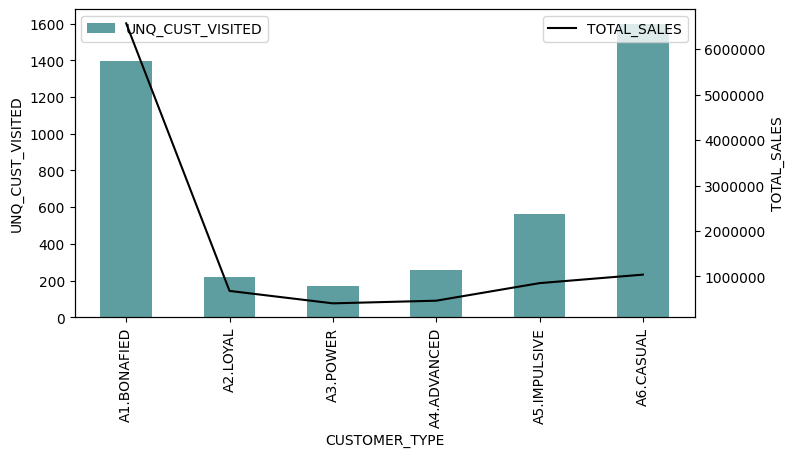

In [37]:
anlys = datamodel[['CUSTOMER_TYPE','CUSTOMER_ID','VISIT_MONTH','SALES_REV']].groupby('CUSTOMER_TYPE').aggregate({'CUSTOMER_ID' :pd.Series.nunique, 'CUSTOMER_TYPE': 'count', 'SALES_REV':'sum'}).rename({'CUSTOMER_ID':'UNQ_CUST_VISITED','CUSTOMER_TYPE':'TOTAL_VISITS','SALES_REV':'TOTAL_SALES'},axis=1)
anlys['SPENT_PER_VISIT'] = (anlys['TOTAL_SALES']/ anlys['TOTAL_VISITS'] )
anlys['SPENT_PER_MONTH'] = anlys['TOTAL_SALES']/ anlys['UNQ_CUST_VISITED'] 
plot_two_axes('UNQ_CUST_VISITED',"TOTAL_SALES")
anlys.head()

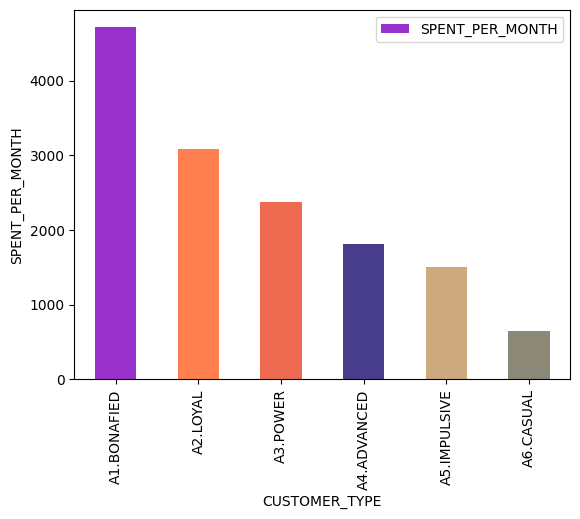

In [38]:
plot_anlys('SPENT_PER_MONTH')

Age bucket and Customer type wise Unique customers, Total Visits, total Spent, Spent per Month and spent per visit.

UNQ_CUST_VISITED  TOTAL_VISITS  TOTAL_SALES  \
CUSTOMER_TYPE Age_bucket                                                      
A1.BONAFIED   A1.YOUNG-AGE                   223         70509  1047186.824   
              A2.MID-OLD-AGE                 375        117848  1767301.113   
              A2.MID-YOUNG-AGE               354        112448  1682004.284   
              A3.MID-AGE                     374        116935  1743090.042   
              A5.OLD-AGE                      68         21759   329692.642   
A2.LOYAL      A1.YOUNG-AGE                    34          6835   107041.691   
              A2.MID-OLD-AGE                  49          9952   147617.328   
              A2.MID-YOUNG-AGE                67         14163   213808.217   
              A3.MID-AGE                      57         11659   174464.409   
              A5.OLD-AGE                      13          2514    36658.200   
A3.POWER      A1.YOUNG-AGE                    35          5664    83902.491   
              A2.MID-OLD-AGE                  45          7300   105218.635   
              A2.MID-YOUNG-AGE                42          6322   101412.846   
              A3.MID-AGE                      39          6486    91477.988   
              A5.OLD-AGE                      10          1674    24013.822   
A4.ADVANCED   A1.YOUNG-AGE                    40          5138    73206.239   
              A2.MID-OLD-AGE                  73          9186   133809.598   
              A2.MID-YOUNG-AGE                64          7951   115853.162   
              A3.MID-AGE                      68          8447   122554.260   
              A5.OLD-AGE                      11          1319    18945.593   
A5.IMPULSIVE  A1.YOUNG-AGE                   114         10749   170487.943   
              A2.MID-OLD-AGE                 149         13980   221712.566   
              A2.MID-YOUNG-AGE               147         13801   220743.991   
              A3.MID-AGE                     124         11910   190132.247   
              A5.OLD-AGE                      31          3026    48007.063   
A6.CASUAL     A1.YOUNG-AGE                   292         13559   188348.350   
              A2.MID-OLD-AGE                 438         21155   293920.614   
              A2.MID-YOUNG-AGE               409         18670   259927.641   
              A3.MID-AGE                     373         17424   242807.671   
              A5.OLD-AGE                      86          3906    53042.111   

                                SPENT_PER_VISIT  SPENT_PER_MONTH  
CUSTOMER_TYPE Age_bucket                                          
A1.BONAFIED   A1.YOUNG-AGE               14.852         4695.905  
              A2.MID-OLD-AGE             14.996         4712.803  
              A2.MID-YOUNG-AGE           14.958         4751.425  
              A3.MID-AGE                 14.906         4660.669  
              A5.OLD-AGE                 15.152         4848.421  
A2.LOYAL      A1.YOUNG-AGE               15.661         3148.285  
              A2.MID-OLD-AGE             14.833         3012.599  
              A2.MID-YOUNG-AGE           15.096         3191.167  
              A3.MID-AGE                 14.964         3060.779  
              A5.OLD-AGE                 14.582         2819.862  
A3.POWER      A1.YOUNG-AGE               14.813         2397.214  
              A2.MID-OLD-AGE             14.414         2338.192  
              A2.MID-YOUNG-AGE           16.041         2414.592  
              A3.MID-AGE                 14.104         2345.589  
              A5.OLD-AGE                 14.345         2401.382  
A4.ADVANCED   A1.YOUNG-AGE               14.248         1830.156  
              A2.MID-OLD-AGE             14.567         1833.008  
              A2.MID-YOUNG-AGE           14.571         1810.206  
              A3.MID-AGE                 14.509         1802.269  
              A5.OLD-AGE                 14.364         1722.327  
A5.IMPULSIVE  A1.YOUNG-AGE   

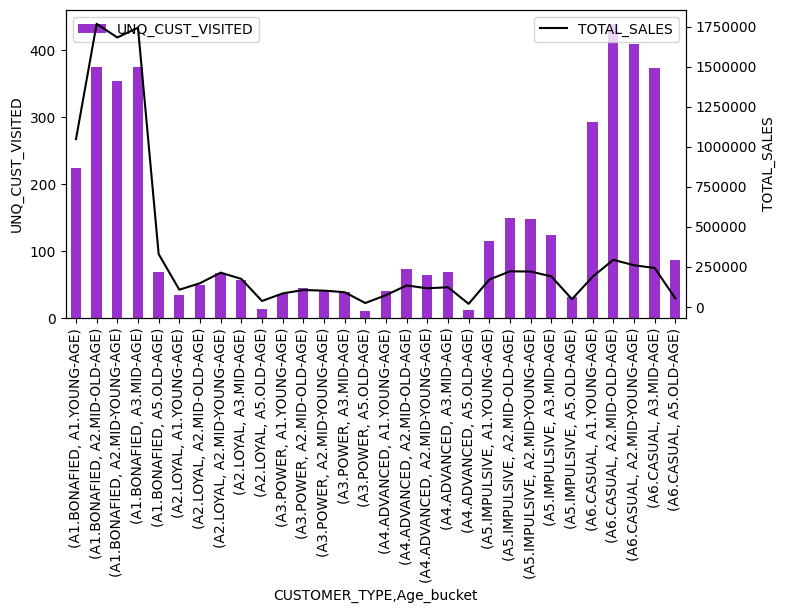

In [39]:
anlys = datamodel[['Age_bucket','CUSTOMER_TYPE','CUSTOMER_ID','VISIT_MONTH','SALES_REV']].groupby(['CUSTOMER_TYPE','Age_bucket']).aggregate({'CUSTOMER_ID' :pd.Series.nunique, 'VISIT_MONTH': 'count', 'SALES_REV':'sum'}).rename({'CUSTOMER_ID':'UNQ_CUST_VISITED','VISIT_MONTH':'TOTAL_VISITS','SALES_REV':'TOTAL_SALES'},axis=1)
anlys['SPENT_PER_VISIT'] = (anlys['TOTAL_SALES']/ anlys['TOTAL_VISITS'] )
anlys['SPENT_PER_MONTH'] = anlys['TOTAL_SALES']/ anlys['UNQ_CUST_VISITED'] 
plot_two_axes('UNQ_CUST_VISITED','TOTAL_SALES')
anlys

THE DISTRIBUTION IS SUCH THAT AS MORE CUSTOMERS VISITED THE STORE, MORE SALES HAPPENED
but CASUAL type customers usually visit more than they spend

The customers who bought the same brand for more than 6 times in a year

In [40]:
anlys = datamodel[['CUSTOMER_ID','BRAND','VISIT_YEAR']].groupby(['CUSTOMER_ID','VISIT_YEAR','BRAND']).agg({'BRAND':'count'}).rename({'BRAND':'TIMES_BOUGHT'},axis=1)
anlys[anlys['TIMES_BOUGHT']>=6]

TIMES_BOUGHT
CUSTOMER_ID VISIT_YEAR BRAND                 
143491      2020       bb Royal             6
            2021       Fresho               6
151294      2020       Fresho               9
                       bb Royal             6
168978      2020       Fresho               9
...                                       ...
3603263     2020       BB Home              7
3603313     2021       Fresho               6
3619251     2021       bb Royal             6
3634656     2020       BB Home              8
            2021       BB Home             12

[792 rows x 1 columns]

Each Month wise which customer did the highest purchase

In [41]:
# MONTH WISE TOP SPENDING CUSTOMER
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR','SALES_REV']].groupby(['CUSTOMER_ID','VISIT_YEAR','VISIT_MONTH']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL_SALES'},axis=1)
anlys =  anlys.reset_index()
anlys = anlys.sort_values(by=['VISIT_YEAR','VISIT_MONTH','TOTAL_SALES'], ascending=[True,True,False])
anlys['rank'] = anlys.groupby(['VISIT_YEAR','VISIT_MONTH'])['TOTAL_SALES'].rank(ascending=False)
anlys = anlys[anlys['rank']==1].drop('rank',axis=1)
anlys['VISIT_MONTH'] = anlys['VISIT_MONTH'].apply(lambda x: calendar.month_abbr[x])
anlys

,CUSTOMER_ID,VISIT_YEAR,VISIT_MONTH,TOTAL_SALES
24149,2749336,2020,Jan,1784.059
8244,1088282,2020,Feb,2358.210
2971,480015,2020,Mar,1818.144
14055,1704753,2020,Apr,1576.796
17885,2087709,2020,May,1476.195
17325,2036284,2020,Jun,1639.995
20230,2337535,2020,Jul,1693.728
27179,3084665,2020,Aug,1857.319
15972,1918807,2020,Sep,1743.611
13342,1636825,2020,Oct,1743.218


In [42]:
#pulling the details of these customers for contact
top_cust = pd.merge(left= anlys[['CUSTOMER_ID','VISIT_YEAR','VISIT_MONTH']], right=cust_master[['CUSTOMER_ID','First_Name', 'Last_Name','Phone_No','E_Mail']], on='CUSTOMER_ID',how='inner')
top_cust

,CUSTOMER_ID,VISIT_YEAR,VISIT_MONTH,First_Name,Last_Name,Phone_No,E_Mail
0,2749336,2020,Jan,Amie,Labounty,209-955-6458,amie.labounty@gmail.com
1,1088282,2020,Feb,Gayle,Delcambre,208-576-7052,gayle.delcambre@gmail.com
2,480015,2020,Mar,Darrell,Ring,231-351-8702,darrell.ring@yahoo.com
3,1704753,2020,Apr,Ella,Yingst,229-556-2626,ella.yingst@hotmail.com
4,2087709,2020,May,Alma,Celestin,209-409-2051,alma.celestin@shell.com
5,2036284,2020,Jun,Huey,Lemke,262-923-2408,huey.lemke@gmail.com
6,2337535,2020,Jul,David,Parish,480-936-2331,david.parish@hotmail.com
7,3084665,2020,Aug,Norris,Schuette,217-919-7012,norris.schuette@gmail.com
8,1918807,2020,Sep,Maria,Belmonte,239-961-5812,maria.belmonte@gmail.com
9,1636825,2020,Oct,Shan,Blume,216-909-3413,shan.blume@gmail.com


EACH CUSTOMER WISE THE MONTH THEY SPEND THE MOST

In [43]:
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR','SALES_REV']].groupby(['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL_SALES'},axis=1)
anlys =  anlys.reset_index()
anlys = anlys.sort_values(by=['CUSTOMER_ID','TOTAL_SALES'], ascending=[True,False])
anlys_1 = anlys.groupby(['CUSTOMER_ID']).agg({'TOTAL_SALES':'max'}).reset_index()
anlys = pd.merge(left=anlys_1,right=anlys[['CUSTOMER_ID','TOTAL_SALES', 'VISIT_MONTH','VISIT_YEAR']], on=['CUSTOMER_ID','TOTAL_SALES'], how='left')
anlys['MONTH_NAME'] = anlys['VISIT_MONTH'].apply(lambda x: calendar.month_abbr[x])
anlys

,CUSTOMER_ID,TOTAL_SALES,VISIT_MONTH,VISIT_YEAR,MONTH_NAME
0,135974,268.330,12,2020,Dec
1,135977,93.492,1,2021,Jan
2,136291,331.174,3,2020,Mar
3,137150,1098.962,4,2021,Apr
4,138564,776.920,3,2020,Mar
...,...,...,...,...,...
4199,3632188,245.534,8,2021,Aug
4200,3634585,413.825,9,2021,Sep
4201,3634656,1050.890,2,2020,Feb
4202,3635093,195.829,3,2020,Mar


CUSTOMER'S LEAST SPENDING MONTH

In [44]:
anlys = datamodel[['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR','SALES_REV']].groupby(['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL_SALES'},axis=1)
anlys =  anlys.reset_index()
anlys = anlys.sort_values(by=['CUSTOMER_ID','TOTAL_SALES'], ascending=[True,False])
anlys_1 = anlys.groupby(['CUSTOMER_ID']).agg({'TOTAL_SALES':'min'}).reset_index()
anlys = pd.merge(left=anlys_1,right=anlys[['CUSTOMER_ID','TOTAL_SALES', 'VISIT_MONTH','VISIT_YEAR']], on=['CUSTOMER_ID','TOTAL_SALES'], how='left')
anlys['MONTH_NAME'] = anlys['VISIT_MONTH'].apply(lambda x: calendar.month_abbr[x])
anlys

,CUSTOMER_ID,TOTAL_SALES,VISIT_MONTH,VISIT_YEAR,MONTH_NAME
0,135974,268.330,12,2020,Dec
1,135977,93.492,1,2021,Jan
2,136291,111.135,10,2020,Oct
3,137150,33.029,10,2021,Oct
4,138564,58.970,7,2021,Jul
...,...,...,...,...,...
4199,3632188,8.615,5,2021,May
4200,3634585,12.308,1,2020,Jan
4201,3634656,3.215,11,2021,Nov
4202,3635093,195.829,3,2020,Mar


### MONTH WISE CUSTOMER SEGMENTATION
IF CUSTOMER'S SPENT FOR THE MONTH IS ABOVE AVG SALES OF THE MONTH THEN PREMIER ELSE NON PREMIER 

In [45]:
anlys = datamodel[['CUSTOMER_ID','SALES_REV','VISIT_MONTH','VISIT_YEAR']].groupby(['CUSTOMER_ID','VISIT_MONTH','VISIT_YEAR']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL SALES'},axis=1).reset_index()
anlys_1 = anlys.groupby(['VISIT_MONTH','VISIT_YEAR']).agg({'TOTAL SALES':'mean'}).rename({'TOTAL SALES':'AVG SALES PER MONTH'},axis=1).reset_index()
anlys = pd.merge(left=anlys,right=anlys_1,on=['VISIT_MONTH','VISIT_YEAR'],how='left')
anlys['SEGMENT']='Non Premier'
anlys['SEGMENT'][anlys['TOTAL SALES'] >anlys['AVG SALES PER MONTH']]='Premier'
anlys

,CUSTOMER_ID,VISIT_MONTH,VISIT_YEAR,TOTAL SALES,AVG SALES PER MONTH,SEGMENT
0,135974,12,2020,268.330,301.017,Non Premier
1,135977,1,2021,93.492,310.097,Non Premier
2,136291,3,2020,331.174,307.289,Premier
3,136291,5,2020,321.961,319.795,Premier
4,136291,10,2020,111.135,314.396,Non Premier
...,...,...,...,...,...,...
32491,3636537,9,2021,921.458,319.092,Premier
32492,3636537,10,2020,457.924,314.396,Premier
32493,3636537,10,2021,86.585,308.693,Non Premier
32494,3636537,12,2020,1025.080,301.017,Premier


THE CUSTOMERS WHO ARE SHOWING PREMIER BEHAVIOR FOR MORE THAN 6 TIMES IN LAST YEAR

In [46]:
anlys_1 = anlys[(anlys['SEGMENT']=='Premier') & (anlys['VISIT_YEAR']==2021)].groupby( ['CUSTOMER_ID']).agg({'SEGMENT':'count'}).rename({'SEGMENT':'COUNT OF PREMIER STATUS'},axis=1).reset_index()
anlys_1 = anlys_1[anlys_1['COUNT OF PREMIER STATUS']> 6]
anlys_1

,CUSTOMER_ID,COUNT OF PREMIER STATUS
52,213610,7
408,649653,8
415,657535,7
624,933439,7
771,1126400,7
1356,1815517,7
1378,1849806,7
1596,2089347,7
1680,2188790,8
1752,2281283,7


CUSTOMER WHO REPEATED THE SAME PRODUCT FOR MORE THAN 10 TIMES IN THE LAST 12 MONTHS

In [47]:
anlys = datamodel[['CUSTOMER_ID','BRAND','VISIT_YEAR']].groupby(['CUSTOMER_ID','VISIT_YEAR','BRAND']).agg({'BRAND':'count'}).rename({'BRAND':'TIMES_BOUGHT'},axis=1).reset_index()
anlys[(anlys['TIMES_BOUGHT']>=10)&(anlys['VISIT_YEAR']==2021)]

,CUSTOMER_ID,VISIT_YEAR,BRAND,TIMES_BOUGHT
32914,351804,2021,bb Royal,10
40281,392911,2021,Fresho,10
101111,785048,2021,Fresho,10
177281,1243314,2021,bb Royal,11
241176,1623714,2021,Fresho,11
415776,2630818,2021,Fresho,10
558354,3435172,2021,BB Home,11
575710,3522867,2021,bb Royal,12
592450,3634656,2021,BB Home,12


In [48]:
datamodel.columns

Index(['CUSTOMER_ID', 'State', 'PROD_CAT', 'PROD_ID', 'VISIT_YEAR',
       'VISIT_MONTH', 'ORDER_QTY', 'First_Name', 'Last_Name', 'Gender',
       'Date_of_Birth', 'SSN', 'Phone_No', 'STATE_NAME', 'Zip', 'Region',
       'STORE_REG_DATE', 'Age', 'Relationship_age', 'Age_bucket', 'AON',
       'STORE_ID', 'STORE_NAME', 'PROVINCE', 'STORE_INC_DATE',
       'STORE_SIZE_SQ_FT', 'NO_OF_STAFFS', 'Store_size', 'store_age',
       'STORE_TYPE', 'PRODUCT', 'CATEGORY', 'SUB_CATEGORY', 'BRAND',
       'SALES_PRICE', 'MARKET_PRICE', 'MARKET_USD', 'TYPE', 'CAT',
       'COST_PRICE', 'SALES_REV', 'VISIT_SEGMENT', 'CUSTOMER_SEGMENT',
       'CUSTOMER_TYPE'],
      dtype='object')

In [49]:
datamodel['Age_bucket'].value_counts()

A2.MID-OLD-AGE      179421
A2.MID-YOUNG-AGE    173355
A3.MID-AGE          172861
A1.YOUNG-AGE        112454
A5.OLD-AGE           34198
Name: Age_bucket, dtype: int64

CUSTOMER TYPE AND AGE BUCKET WISE COUNT OF UNIQUE CUSTOMERS AND THE TOTAL SPENT

UNIQUE CUSTOMERS  TOTAL_SPENT
CUSTOMER_TYPE Age_bucket                                     
A1.BONAFIED   A1.YOUNG-AGE                   223  1047186.824
              A2.MID-OLD-AGE                 375  1767301.113
              A2.MID-YOUNG-AGE               354  1682004.284
              A3.MID-AGE                     374  1743090.042
              A5.OLD-AGE                      68   329692.642
A2.LOYAL      A1.YOUNG-AGE                    34   107041.691
              A2.MID-OLD-AGE                  49   147617.328
              A2.MID-YOUNG-AGE                67   213808.217
              A3.MID-AGE                      57   174464.409
              A5.OLD-AGE                      13    36658.200
A3.POWER      A1.YOUNG-AGE                    35    83902.491
              A2.MID-OLD-AGE                  45   105218.635
              A2.MID-YOUNG-AGE                42   101412.846
              A3.MID-AGE                      39    91477.988
              A5.OLD-AGE                      10    24013.822
A4.ADVANCED   A1.YOUNG-AGE                    40    73206.239
              A2.MID-OLD-AGE                  73   133809.598
              A2.MID-YOUNG-AGE                64   115853.162
              A3.MID-AGE                      68   122554.260
              A5.OLD-AGE                      11    18945.593
A5.IMPULSIVE  A1.YOUNG-AGE                   114   170487.943
              A2.MID-OLD-AGE                 149   221712.566
              A2.MID-YOUNG-AGE               147   220743.991
              A3.MID-AGE                     124   190132.247
              A5.OLD-AGE                      31    48007.063
A6.CASUAL     A1.YOUNG-AGE                   292   188348.350
              A2.MID-OLD-AGE                 438   293920.614
              A2.MID-YOUNG-AGE               409   259927.641
              A3.MID-AGE                     373   242807.671
              A5.OLD-AGE                      86    53042.111

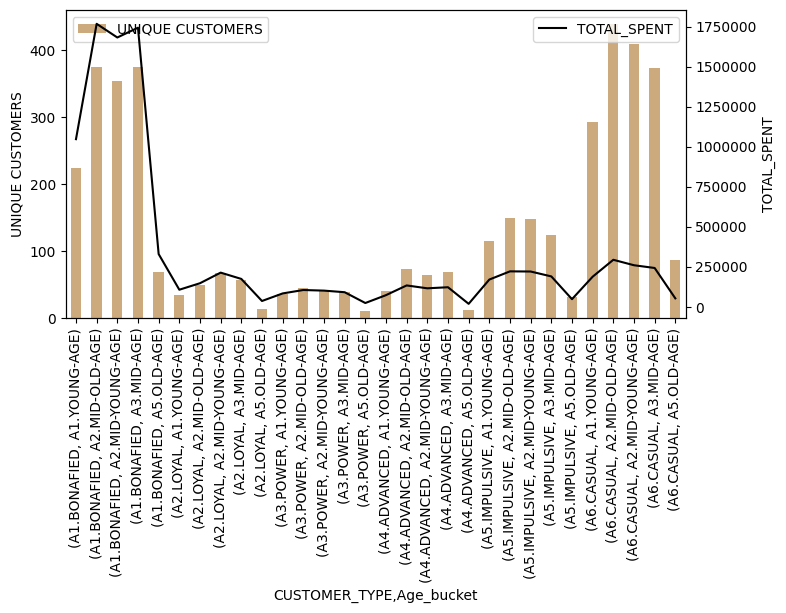

In [50]:
anlys = datamodel[['CUSTOMER_TYPE','Age_bucket','CUSTOMER_ID','SALES_REV']].groupby(['CUSTOMER_TYPE','Age_bucket']).agg({'CUSTOMER_ID':pd.Series.nunique,"SALES_REV":"sum"}).rename({'CUSTOMER_ID':'UNIQUE CUSTOMERS',"SALES_REV":'TOTAL_SPENT'},axis=1)
plot_two_axes('UNIQUE CUSTOMERS','TOTAL_SPENT')
anlys

CUSTOMER TYPE AND AGE BUCKET WISE COUNT OF UNIQUE CUSTOMERS AND THE TOTAL SPENT IN %

In [51]:
TOTAL_UNQ = sum(anlys['UNIQUE CUSTOMERS'])
TOTAL_SPENT = sum(anlys['TOTAL_SPENT'])
anlys['UNIQUE CUSTOMERS'] = (anlys['UNIQUE CUSTOMERS']/TOTAL_UNQ).apply(lambda x: '{:,.2%}'.format(x))
anlys['TOTAL_SPENT']= (anlys['TOTAL_SPENT']/TOTAL_SPENT).apply(lambda x: '{:,.2%}'.format(x))
anlys

UNIQUE CUSTOMERS TOTAL_SPENT
CUSTOMER_TYPE Age_bucket                                   
A1.BONAFIED   A1.YOUNG-AGE                5.30%      10.46%
              A2.MID-OLD-AGE              8.92%      17.66%
              A2.MID-YOUNG-AGE            8.42%      16.81%
              A3.MID-AGE                  8.90%      17.42%
              A5.OLD-AGE                  1.62%       3.29%
A2.LOYAL      A1.YOUNG-AGE                0.81%       1.07%
              A2.MID-OLD-AGE              1.17%       1.47%
              A2.MID-YOUNG-AGE            1.59%       2.14%
              A3.MID-AGE                  1.36%       1.74%
              A5.OLD-AGE                  0.31%       0.37%
A3.POWER      A1.YOUNG-AGE                0.83%       0.84%
              A2.MID-OLD-AGE              1.07%       1.05%
              A2.MID-YOUNG-AGE            1.00%       1.01%
              A3.MID-AGE                  0.93%       0.91%
              A5.OLD-AGE                  0.24%       0.24%
A4.ADVANCED   A1.YOUNG-AGE                0.95%       0.73%
              A2.MID-OLD-AGE              1.74%       1.34%
              A2.MID-YOUNG-AGE            1.52%       1.16%
              A3.MID-AGE                  1.62%       1.22%
              A5.OLD-AGE                  0.26%       0.19%
A5.IMPULSIVE  A1.YOUNG-AGE                2.71%       1.70%
              A2.MID-OLD-AGE              3.54%       2.22%
              A2.MID-YOUNG-AGE            3.50%       2.21%
              A3.MID-AGE                  2.95%       1.90%
              A5.OLD-AGE                  0.74%       0.48%
A6.CASUAL     A1.YOUNG-AGE                6.95%       1.88%
              A2.MID-OLD-AGE             10.42%       2.94%
              A2.MID-YOUNG-AGE            9.73%       2.60%
              A3.MID-AGE                  8.87%       2.43%
              A5.OLD-AGE                  2.05%       0.53%

# PRODUCT ANALYTICS

CATEGORY WISE UNIQUE CUSTOMERS, TOTAL ORDERS, AND TOTAL SALES

,UNIQUE CUST,TOTAL_SALES,TOTAL_ORDERS
CATEGORY,,,
Baby Care,3448,356416.308,14845
"Bakery, Cakes & Dairy",3702,139598.330,21436
Beauty & Hygiene,4179,3680120.218,188476
Beverages,3745,245165.424,22034
Cleaning & Household,4100,690294.595,67363
"Eggs, Meat & Fish",3082,125162.241,9342
"Foodgrains, Oil & Masala",4093,529753.756,65080
Fruits & Vegetables,3093,23687.740,9689
Gourmet & World Food,4150,1699821.672,117056


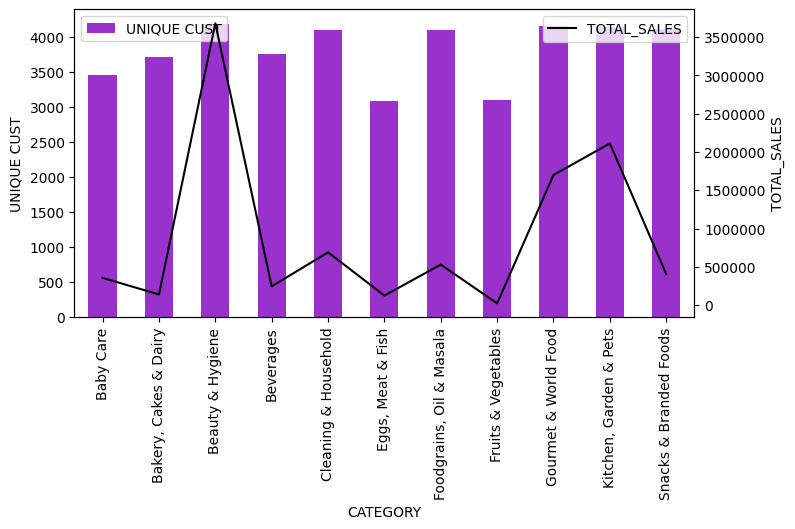

In [52]:
anlys = datamodel[['CUSTOMER_ID','CATEGORY','SALES_REV']].groupby('CATEGORY').agg({'CUSTOMER_ID':pd.Series.nunique, 'SALES_REV':'sum','CATEGORY':'count'}).rename({'CUSTOMER_ID':'UNIQUE CUST','SALES_REV':'TOTAL_SALES','CATEGORY':'TOTAL_ORDERS'},axis=1)
plot_two_axes('UNIQUE CUST','TOTAL_SALES')
anlys

CATEGORY AND BRAND WISE UNIQUE CUSTOMERS, TOTAL ORDERS, AND TOTAL SALES

In [53]:
anlys = datamodel[['CUSTOMER_ID','CATEGORY','BRAND','SALES_REV']].groupby(['CATEGORY','BRAND']).agg({'CUSTOMER_ID':pd.Series.nunique, 'SALES_REV':'sum','CATEGORY':'count'}).rename({'CUSTOMER_ID':'UNIQUE CUST','SALES_REV':'TOTAL_SALES','CATEGORY':'TOTAL_ORDERS'},axis=1)
anlys

UNIQUE CUST  TOTAL_SALES  TOTAL_ORDERS
CATEGORY               BRAND                                             
Baby Care              1st Bites            54      575.769            54
                       Amul                 39      777.538            40
                       Aptamil              79     2662.000            79
                       Aveeno              136     5695.154           137
                       BIOTIQUE             41      196.165            41
...                                        ...          ...           ...
Snacks & Branded Foods bb Combo             54      825.600            54
                       bb Popular           42      305.615            42
                       bb Royal            277     4196.447           295
                       iD Fresho           147      743.340           149
                       sumeru              373     3930.595           402

[2772 rows x 3 columns]

category and brand wise top 10 selling products and their respective market share in %

In [54]:
anlys = datamodel[['CUSTOMER_ID','CATEGORY','SALES_REV','BRAND']].groupby(['CATEGORY','BRAND']).agg({'CUSTOMER_ID':pd.Series.nunique, 'SALES_REV':'sum','CATEGORY':'count'}).rename({'CUSTOMER_ID':'UNIQUE CUST','SALES_REV':'TOTAL_SALES','CATEGORY':'TOTAL_ORDERS'},axis=1)
anlys['RANK'] = anlys['TOTAL_SALES'].groupby('CATEGORY').rank(ascending=False)
TOTAL = anlys['TOTAL_ORDERS'].sum()
anlys['MARKET SHARE'] = (anlys['TOTAL_ORDERS']/ TOTAL).apply(lambda x: '{:.2%}'.format(x))
anlys[anlys['RANK']<=10]

UNIQUE CUST  TOTAL_SALES  \
CATEGORY               BRAND                                            
Baby Care              Bella                         372    14965.554   
                       Chicco                        568    10967.646   
                       Himalaya                      652    15123.738   
                       Huggies                       972    52136.455   
                       Mamaearth                     808    16525.400   
...                                                  ...          ...   
Snacks & Branded Foods MTR                          1207     7004.948   
                       NUTRIWISH                     612    16889.692   
                       RiteBite Max Protein          714    11899.600   
                       Sangam Sweets                 425     9467.077   
                       True Elements                 420     9551.154   

                                             TOTAL_ORDERS   RANK MARKET SHARE  
CATEGORY               BRAND                                                   
Baby Care              Bella                          398  8.000        0.06%  
                       Chicco                         634 10.000        0.09%  
                       Himalaya                       759  7.000        0.11%  
                       Huggies                       1178  2.000        0.18%  
                       Mamaearth                      961  5.000        0.14%  
...                                                   ...    ...          ...  
Snacks & Branded Foods MTR                           1616 10.000        0.24%  
                       NUTRIWISH                      690  1.000        0.10%  
                       RiteBite Max Protein           816  2.000        0.12%  
                       Sangam Sweets                  458  7.000        0.07%  
                       True Elements                  454  6.000        0.07%  

[105 rows x 5 columns]

CATEGORY, BRAND AND PRODUCT WISE SALES

In [55]:
anlys = datamodel[['CATEGORY','BRAND','PRODUCT','SALES_REV']].groupby(['CATEGORY','BRAND','PRODUCT']).agg({'SALES_REV':'sum'}).rename({'SALES_REV':'TOTAL_SALES'},axis=1).reset_index()
anlys.sort_values(by=['CATEGORY','BRAND','PRODUCT','TOTAL_SALES'], ascending=[True,True,True,False])

,CATEGORY,BRAND,PRODUCT,TOTAL_SALES
0,Baby Care,1st Bites,"Ragi & Dal - Stage-2, 8- 24 Months",183.462
1,Baby Care,1st Bites,"Ragi - Stage-1, 6-24 Months",392.308
2,Baby Care,Amul,Spray Infant Milk Food/Substitute,777.538
3,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage 2, Fro...",1144.000
4,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage-3, Fro...",638.000
...,...,...,...,...
24323,Snacks & Branded Foods,sumeru,Jumbo Prawns,252.538
24324,Snacks & Branded Foods,sumeru,Masala French Fries - Piri Piri,76.915
24325,Snacks & Branded Foods,sumeru,Medium Prawns,398.077
24326,Snacks & Branded Foods,sumeru,Ocean Fresh - Seerfish Prime Steaks (Individua...,587.095


In [56]:
# LETS FIND OUT THE EACH BRAND TOTAL SALES AND EACH CATEGORY AVERAGE SALES 
anlys_1 = anlys[['BRAND','TOTAL_SALES']].groupby('BRAND').agg({'TOTAL_SALES':'sum'}).rename({'TOTAL_SALES':'TOTAL BRAND SALES'},axis=1).reset_index()
anlys_2 = anlys[['CATEGORY','TOTAL_SALES']].groupby('CATEGORY').agg({'TOTAL_SALES':'mean'}).rename({'TOTAL_SALES':'AVG CAT SALES'},axis=1).reset_index()
anlys = pd.merge(left=anlys,right=anlys_1,on='BRAND',how='left')
anlys = pd.merge(left=anlys, right=anlys_2,on='CATEGORY',how='left')

In [57]:
# WE MAPPPED THEM BACK TO THE CATEGORY,BRAND AND PRODUCT WISE SUMMARY TABLE TO GET WHICH SEGMENT EACH PRODUCT BELONGS IN
#THEN MAPPED THEM BACK TO DATAMODEL
anlys['PRODUCT SEGMENT'] = 'Retail'
anlys['PRODUCT SEGMENT'][anlys['TOTAL BRAND SALES']> 0.5*anlys['AVG CAT SALES']] = 'Power'
anlys['PRODUCT SEGMENT'][anlys['TOTAL BRAND SALES']>=anlys['AVG CAT SALES']] = 'Premier'
anlys['PRODUCT SEGMENT'][anlys['TOTAL BRAND SALES']>=1.25*anlys['AVG CAT SALES']] = 'Hi-Tech'
datamodel = pd.merge(left=datamodel,right=anlys[['PRODUCT SEGMENT','PRODUCT']], on='PRODUCT',how='left')
anlys


,CATEGORY,BRAND,PRODUCT,TOTAL_SALES,TOTAL BRAND SALES,AVG CAT SALES,PRODUCT SEGMENT
0,Baby Care,1st Bites,"Ragi & Dal - Stage-2, 8- 24 Months",183.462,575.769,656.384,Power
1,Baby Care,1st Bites,"Ragi - Stage-1, 6-24 Months",392.308,575.769,656.384,Power
2,Baby Care,Amul,Spray Infant Milk Food/Substitute,777.538,29371.931,656.384,Hi-Tech
3,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage 2, Fro...",1144.000,2662.000,656.384,Hi-Tech
4,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage-3, Fro...",638.000,2662.000,656.384,Hi-Tech
...,...,...,...,...,...,...,...
24323,Snacks & Branded Foods,sumeru,Jumbo Prawns,252.538,4790.860,162.193,Hi-Tech
24324,Snacks & Branded Foods,sumeru,Masala French Fries - Piri Piri,76.915,4790.860,162.193,Hi-Tech
24325,Snacks & Branded Foods,sumeru,Medium Prawns,398.077,4790.860,162.193,Hi-Tech
24326,Snacks & Branded Foods,sumeru,Ocean Fresh - Seerfish Prime Steaks (Individua...,587.095,4790.860,162.193,Hi-Tech


CATEGORY , PRODUCT SEGMENT AND BRAND WISE TOP 10 SELLING PRODUCT

In [69]:
anlys['RANK']= anlys.groupby(['CATEGORY','PRODUCT SEGMENT','BRAND'])['TOTAL_SALES'].rank(ascending=False)
anlys[['CATEGORY','BRAND','PRODUCT SEGMENT','PRODUCT','RANK']][anlys['RANK']<=10]

,CATEGORY,BRAND,PRODUCT SEGMENT,PRODUCT,RANK
0,Baby Care,1st Bites,Power,"Ragi & Dal - Stage-2, 8- 24 Months",2.000
1,Baby Care,1st Bites,Power,"Ragi - Stage-1, 6-24 Months",1.000
2,Baby Care,Amul,Hi-Tech,Spray Infant Milk Food/Substitute,1.000
3,Baby Care,Aptamil,Hi-Tech,"Follow Up Infant Formula Powder - Stage 2, Fro...",1.000
4,Baby Care,Aptamil,Hi-Tech,"Follow Up Infant Formula Powder - Stage-3, Fro...",3.000
...,...,...,...,...,...
24322,Snacks & Branded Foods,sumeru,Hi-Tech,Green Peas,6.000
24323,Snacks & Branded Foods,sumeru,Hi-Tech,Jumbo Prawns,8.000
24325,Snacks & Branded Foods,sumeru,Hi-Tech,Medium Prawns,4.000
24326,Snacks & Branded Foods,sumeru,Hi-Tech,Ocean Fresh - Seerfish Prime Steaks (Individua...,2.000


CATEGORY , PRODUCT SEGMENT AND BRAND WISE TOP 10 SELLING PRODUCT AND THEIR UNIQUE CUSTOMER COUNT

In [82]:
anlys = datamodel[['CUSTOMER_TYPE','CATEGORY','BRAND','PRODUCT','SALES_REV']].groupby(['CATEGORY','BRAND','PRODUCT']).agg({'SALES_REV':'sum','CUSTOMER_TYPE':pd.Series.nunique}).rename({'SALES_REV':'TOTAL_SALES','CUSTOMER_TYPE':'UNIQUE COUNT'},axis=1).reset_index()
anlys.sort_values(by=['CATEGORY','BRAND','PRODUCT','TOTAL_SALES'], ascending=[True,True,True,False])
anlys['RANK']= anlys.groupby(['CATEGORY','BRAND'])['TOTAL_SALES'].rank(ascending=False)
anlys[['CATEGORY','BRAND','PRODUCT','UNIQUE COUNT','TOTAL_SALES','RANK']][anlys['RANK']<=10]

,CATEGORY,BRAND,PRODUCT,UNIQUE COUNT,TOTAL_SALES,RANK
0,Baby Care,1st Bites,"Ragi & Dal - Stage-2, 8- 24 Months",3,183.462,2.000
1,Baby Care,1st Bites,"Ragi - Stage-1, 6-24 Months",5,392.308,1.000
2,Baby Care,Amul,Spray Infant Milk Food/Substitute,6,777.538,1.000
3,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage 2, Fro...",5,1144.000,1.000
4,Baby Care,Aptamil,"Follow Up Infant Formula Powder - Stage-3, Fro...",5,638.000,3.000
...,...,...,...,...,...,...
24322,Snacks & Branded Foods,sumeru,Green Peas,6,1051.615,1.000
24323,Snacks & Branded Foods,sumeru,Jumbo Prawns,4,252.538,9.000
24325,Snacks & Branded Foods,sumeru,Medium Prawns,6,398.077,6.000
24326,Snacks & Branded Foods,sumeru,Ocean Fresh - Seerfish Prime Steaks (Individua...,5,587.095,4.000


BRAND WISE PRODUCTS WHICH SHOWED INCREASED SALES FOR THE PAST 6 MONTHS

In [102]:
anlys = datamodel[['CUSTOMER_ID','BRAND','PRODUCT','SALES_REV','VISIT_MONTH','VISIT_YEAR']].groupby(['BRAND','PRODUCT','VISIT_YEAR','VISIT_MONTH']).agg({'SALES_REV':"sum"}).reset_index()
anlys = anlys[(anlys['VISIT_MONTH']>6)&(anlys['VISIT_YEAR']==2021)] # SALES FOR THE LAST 6 MONTHS(7-12) OF THE YEAR 2021
anlys['shifted'] = anlys['SALES_REV'].shift(1)
anlys['Increased sales flag'] = 0
anlys['Increased sales flag'][anlys['SALES_REV']>anlys['shifted']] = 1
anlys_1 = anlys.groupby(['BRAND','PRODUCT']).agg({'PRODUCT':'count','Increased sales flag':'sum'}).rename({'PRODUCT':'TOTAL'},axis=1)
anlys_1[anlys_1['TOTAL']==anlys_1['Increased sales flag']]

TOTAL  \
BRAND         PRODUCT                                                     
24 Mantra     Organic - Masoor Malka                                  1   
              Organic Green Tea                                       3   
3BO           Deltoid Turbo Face Masks In Navy Mesh With Navy...      2   
50ap          Bathing Bar - Lemongrass & Basil                        2   
ALF-FARMS     Sausages - Bracks Ghost Chilli Chicken                  1   
...                                                                 ...   
iD Fresho     Idly Dosa Batter, 1 Kg + Whole Wheat Parota, 350 g      1   
kwality walls Desi Twist - Creamy Kulfi                               1   
mJOY          Premium Hygienic Large Period Cup - Reusable, W...      1   
marshmallow   Marshmallow                                             3   
moha          Oil - Massage, Rejuvenating                             2   

                                                                  Increased sales flag  
BRAND         PRODUCT                                                                   
24 Mantra     Organic - Masoor Malka                                                 1  
              Organic Green Tea                                                      3  
3BO           Deltoid Turbo Face Masks In Navy Mesh With Navy...                     2  
50ap          Bathing Bar - Lemongrass & Basil                                       2  
ALF-FARMS     Sausages - Bracks Ghost Chilli Chicken                                 1  
...                                                                                ...  
iD Fresho     Idly Dosa Batter, 1 Kg + Whole Wheat Parota, 350 g                     1  
kwality walls Desi Twist - Creamy Kulfi                                              1  
mJOY          Premium Hygienic Large Period Cup - Reusable, W...                     1  
marshmallow   Marshmallow                                                            3  
moha          Oil - Massage, Rejuvenating                                            2  

[940 rows x 2 columns]

BRAND AND PRODUCT WISE AVERAGE QUANTITY SOLD IN A YEAR

In [111]:
anlys = datamodel.groupby(['BRAND','PRODUCT','VISIT_YEAR']).agg({'ORDER_QTY':'sum'}).reset_index()
anlys = anlys.groupby(['BRAND','PRODUCT']).agg({'ORDER_QTY':'mean'}).rename({'ORDER_QTY':'AVG_ORDERS_IN_YEAR'},axis=1)
anlys

AVG_ORDERS_IN_YEAR
BRAND    PRODUCT                                                               
&Me      PCOS Green Tea - Kashmiri Kahwa                                 57.000
         PCOS Green Tea - Lavender & Chamomile                           56.500
         Skin Women's Health Drink - Watermelon & Rose                   74.000
&Stirred Cocktail Mix - Whisky Sour                                      29.500
         Cosmopolitan - Cranberry & Orange                               26.500
...                                                                         ...
sumeru   Medium Prawns                                                   57.500
         Ocean Fresh - Seerfish Prime Steaks (Individual...              42.000
         Pork - Back Bacon                                               73.000
         Premium Fish Fillet                                             44.500
         Quick Snack - Fish Fingers                                      31.500

[24328 rows x 1 columns]

In [126]:
# TOP SELLING PRODUCTS
anlys = datamodel.groupby('PRODUCT').agg({'SALES_REV':'sum'}).reset_index()
anlys['RANK']= anlys['SALES_REV'].rank(ascending=False)
anlys = anlys[anlys['RANK']<=10]
anlys

,PRODUCT,SALES_REV,RANK
6871,Eau De Toilette For Men,27319.846,10.000
7182,Extra Light Olive Oil,94868.294,4.000
7194,Extra Virgin Olive Oil,163016.487,1.000
8431,Ghee/Tuppa,48208.343,6.000
14500,Olive Oil - Extra Light,31184.178,9.000
14502,Olive Oil - Extra Virgin,162867.062,2.000
14507,Olive Oil - Pomace,119245.016,3.000
14508,Olive Oil - Pure,32002.401,8.000
14515,Olive Pomace Oil,94009.577,5.000
22257,Turmeric Powder/Arisina Pudi,40949.522,7.000


In [130]:
#CUSTOMERS WHO BOUGHT THESE PRODUCTS TOGETHER
anlys_1 = datamodel.groupby(['CUSTOMER_ID','PRODUCT']).agg({'SALES_REV':'sum'})
anlys_1

SALES_REV
CUSTOMER_ID PRODUCT                                                      
135974      Alluring Perfumed Deo Spray For Women                  12.246
            Biscuits - Fruit                                        4.615
            Bleach Laser - White                                    6.000
            Body Wash Luminous Oils Invigorating Shower Gel...     16.588
            Creamy Thick Curd                                       1.904
...                                                                   ...
3636537     Whole Wheat Atta/Godihittu - Pesticide Free             8.308
            Whole Wheat Parota                                      2.769
            Wholewheat Sandwich Loaf - 100% Whole Wheat             0.754
            ZigZag Charcoal Medium Bristle Toothbrush               1.615
            lotion - Mosquito Repellent                             4.708

[667953 rows x 1 columns]